# Simulaciones para probar escalar priors en el caso de una regresión logística

Comenzamos con pruebas para intentar conseguir priors que permitan que el rango de variación de $\eta$ no supere valores de magnitud 5. 

Probaremos modelos con solo el intercepto, una variable explicativa y dos variables explicativas, con distintos valores y diferentes variancias. 

In [1]:
import numpy as np
import pandas as pd
from scipy.special import expit
import matplotlib.pyplot as plt

np.random.seed(20010102)

# Tamaño de muestra para el prior
s = 2000

# Tamaño de muestra de las variables
n = 100

## Modelo solo con intercepto

Para comenzar, metemos solo un intercepto a nuestro modelo, el más sencillo de todos. Para mantener los valores entre -5 y 5 alcanza con poner un desvío de 5/3 a una normal. Probaremos también con una variancia de 1 (más chica) y de 3 (más grande) para evaluar sus efectos. 

$$\eta = \beta_0$$

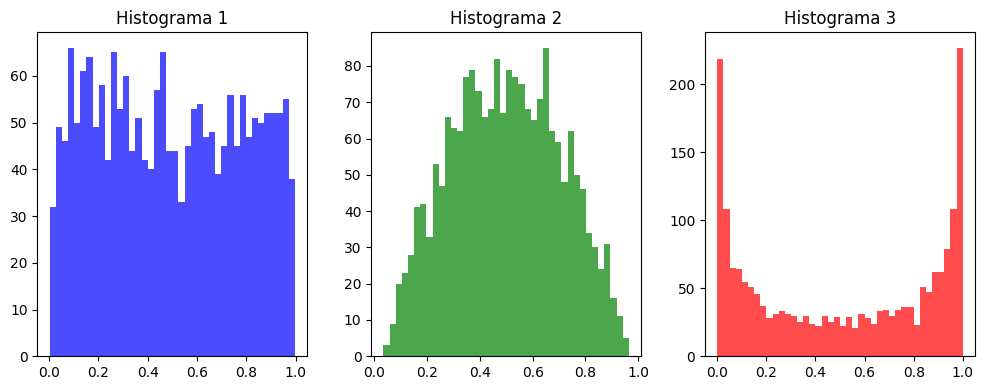

In [2]:
b0_1_1 = np.random.normal(0,5/3,s)
b0_1_2 = np.random.normal(0,1,s)
b0_1_3 = np.random.normal(0,3,s)

eta = b0_1_1
p_1_1 = expit(eta)

eta = b0_1_2
p_1_2 = expit(eta)

eta = b0_1_3
p_1_3 = expit(eta)

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Agregar histogramas a cada subplot
axs[0].hist(p_1_1, bins=40, color='blue', alpha=0.7)
axs[0].set_title('Histograma 1')

axs[1].hist(p_1_2, bins=40, color='green', alpha=0.7)
axs[1].set_title('Histograma 2')

axs[2].hist(p_1_3, bins=40, color='red', alpha=0.7)
axs[2].set_title('Histograma 3')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Utilizando el desvío elegido, la distribución puede tomar valores en todo el rango de 0 a 1, y dentro de todo uniformes. No se detectan modas o tendencias en algún rango de variación. Esto no sucede cuando ponemos priors más chicos o más grandes. Al poner un desvío unitario, eta no llega a cubrir valores del logit extremos cercanos a 0 y 1. Por el contrario, un desvío superior hace que el prior tenga muchos valores cercanos a los casos extremos dado que tenemos valores grandes de eta. 

## Modelo con una variable explicativa

Ahora, probamos metiendo una variable expicativa dentro del modelo. Esto agregará variabilidad al $\eta$. Probemos cómo para distintos modelos y variabilidades de esta variable se ve modificada la distribución del eta. 

$$\eta = \beta_0 + \beta_1 x_1$$

### Variable explicativa $X_1$

En primer lugar, separemos los casos diferentes que planteamos. 

* Distribución: Normal o Uniforme (2)
* Variabilidad: 3, 0.2, 10 (sd normal) / 1, 2, 10 (rango unif) (3) 
* Distinta combinación de variabilidad de $\beta_0$ y $\beta_1$

In [3]:
x1_1 = np.random.normal(0,3,n)
x1_2 = np.random.normal(0,0.2,n)
x1_3 = np.random.normal(0,10,n)
x1_4 = np.random.uniform(-0.005,0.005,n)
x1_5 = np.random.uniform(-1,1,n)
x1_6 = np.random.uniform(-5,5,n)

Caso con X1 dist normal, sd=3, variabilidad 1 en b0 y b1. Vemos como la distribución es muy distinta en diferentes valores de X. Si la estandarizamos, es un poco más uniforme en sus cuantiles

1.007830597729513


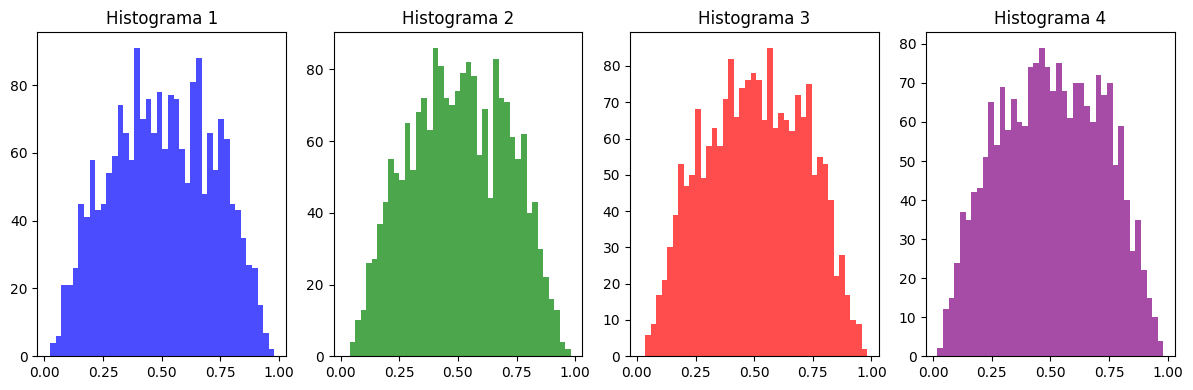

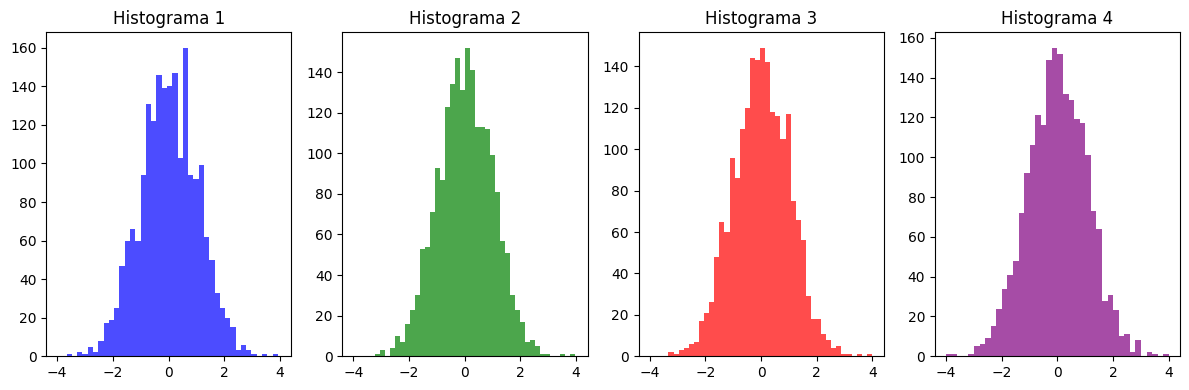

In [6]:
b0_2_1 = np.random.normal(0,1,s)
b1_2_1 = np.random.normal(0,0.5/np.std(x1_1),s)
x1_1_q1 = np.quantile(x1_1, 0.2)
x1_1_q2 = np.quantile(x1_1, 0.4)
x1_1_q3 = np.quantile(x1_1, 0.6)
x1_1_q4 = np.quantile(x1_1, 0.8)

eta_2_1_q1 = b0_2_1 + b1_2_1 * x1_1_q1
p_2_1_q1 = expit(eta_2_1_q1)
eta_2_1_q2 = b0_2_1 + b1_2_1 * x1_1_q2
p_2_1_q2 = expit(eta_2_1_q2)
eta_2_1_q3 = b0_2_1 + b1_2_1 * x1_1_q3
p_2_1_q3 = expit(eta_2_1_q3)
eta_2_1_q4 = b0_2_1 + b1_2_1 * x1_1_q4
p_2_1_q4 = expit(eta_2_1_q4)

print(np.std(eta_2_1_q3))

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharex=True)

# Agregar histogramas a cada subplot
axs[0].hist(p_2_1_q1, bins=40, color='blue', alpha=0.7)
axs[0].set_title('Histograma 1')

axs[1].hist(p_2_1_q2, bins=40, color='green', alpha=0.7)
axs[1].set_title('Histograma 2')

axs[2].hist(p_2_1_q3, bins=40, color='red', alpha=0.7)
axs[2].set_title('Histograma 3')

axs[3].hist(p_2_1_q4, bins=40, color='purple', alpha=0.7)
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show();

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharex=True)

# Agregar histogramas a cada subplot
axs[0].hist(eta_2_1_q1, bins=40, color='blue', alpha=0.7)
axs[0].set_title('Histograma 1')

axs[1].hist(eta_2_1_q2, bins=40, color='green', alpha=0.7)
axs[1].set_title('Histograma 2')

axs[2].hist(eta_2_1_q3, bins=40, color='red', alpha=0.7)
axs[2].set_title('Histograma 3')

axs[3].hist(eta_2_1_q4, bins=40, color='purple', alpha=0.7)
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Caso 2 con X1 dist normal, sd=0.2, variabilidad 1 en b0 y b1. 

Se observa que el eta no varía demasiado con respecto a X1, por lo que el prior mostrado depende muy fuerte del de b0. 
Probé cambiar los desvíos de los betas, y el de b0 influye completamente, y el de b1 influye si las magnitudes son muy grandes.


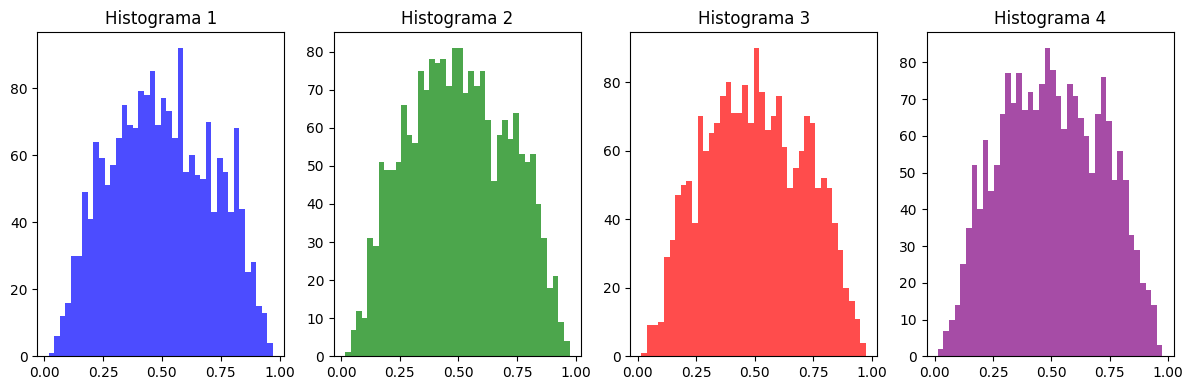

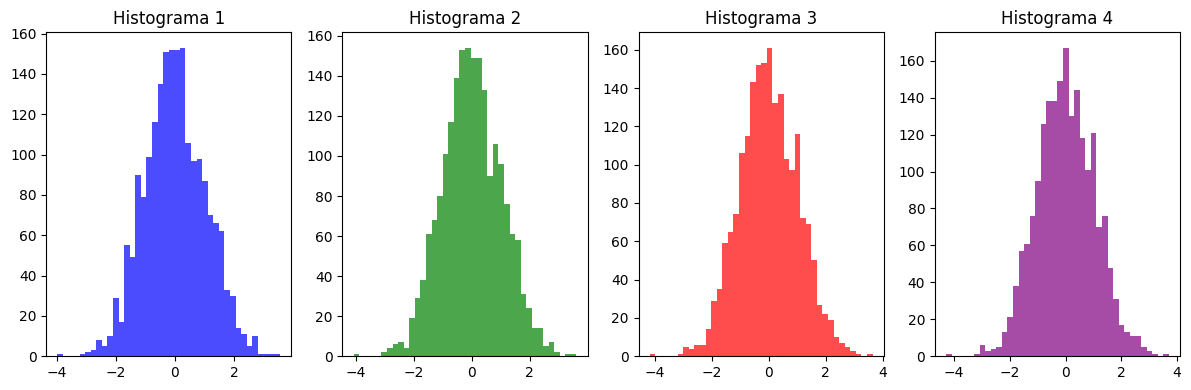

In [7]:
b0_2_2 = np.random.normal(0,1,s)
b1_2_2 = np.random.normal(0,1,s)
x1_2_q1 = np.quantile(x1_2, 0.2)
x1_2_q2 = np.quantile(x1_2, 0.4)
x1_2_q3 = np.quantile(x1_2, 0.6)
x1_2_q4 = np.quantile(x1_2, 0.8)

eta_2_2_q1 = b0_2_2 + b1_2_2 * x1_2_q1
eta_2_2_q2 = b0_2_2 + b1_2_2 * x1_2_q2
eta_2_2_q3 = b0_2_2 + b1_2_2 * x1_2_q3
eta_2_2_q4 = b0_2_2 + b1_2_2 * x1_2_q4
p_2_2_q1 = expit(eta_2_2_q1)
p_2_2_q2 = expit(eta_2_2_q2)
p_2_2_q3 = expit(eta_2_2_q3)
p_2_2_q4 = expit(eta_2_2_q4)

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(p_2_2_q1, bins=40, color='blue', alpha=0.7)
axs[0].set_title('Histograma 1')

axs[1].hist(p_2_2_q2, bins=40, color='green', alpha=0.7)
axs[1].set_title('Histograma 2')

axs[2].hist(p_2_2_q3, bins=40, color='red', alpha=0.7)
axs[2].set_title('Histograma 3')

axs[3].hist(p_2_2_q4, bins=40, color='purple', alpha=0.7)
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show();

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(eta_2_2_q1, bins=40, color='blue', alpha=0.7)
axs[0].set_title('Histograma 1')

axs[1].hist(eta_2_2_q2, bins=40, color='green', alpha=0.7)
axs[1].set_title('Histograma 2')

axs[2].hist(eta_2_2_q3, bins=40, color='red', alpha=0.7)
axs[2].set_title('Histograma 3')

axs[3].hist(eta_2_2_q4, bins=40, color='purple', alpha=0.7)
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Caso 3 con X1 dist normal, sd=10, variabilidad 1 en b0 y b1. Si dejamos así, eta toma valores grandes. Aquí probamos bajándole el desvío a 0.1 al b1, o incluso poniendo sd(x1) en el denominador. Ahí se estabiliza. También podría hasta decirse que en valores de x medianos, para valores extremos de eta, la probabilidad es baja, debiendo poner un poquito más de variabildiad en el eta. Quizás poniendo 1.5 de desvío en el b0.

Si el eta logra un desvío de 1.5, la distribución de p es muy uniforme. 

1.5444209805469888


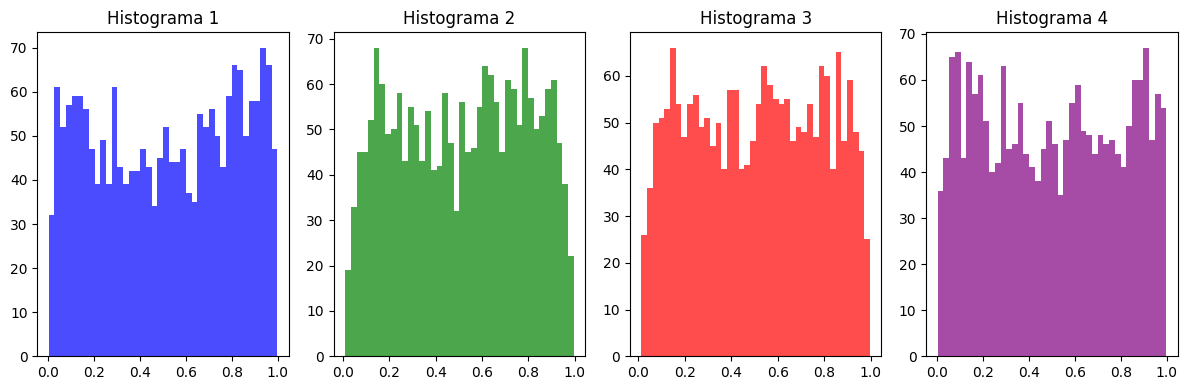

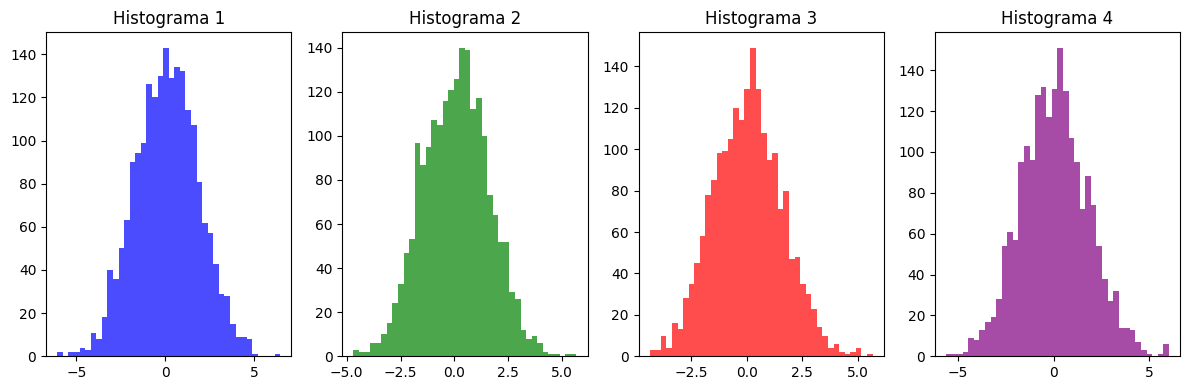

In [8]:
b0_2_3 = np.random.normal(0,1.5,s)
b1_2_3 = np.random.normal(0,1/np.std(x1_3),s)
x1_3_q1 = np.quantile(x1_3, 0.2)
x1_3_q2 = np.quantile(x1_3, 0.4)
x1_3_q3 = np.quantile(x1_3, 0.6)
x1_3_q4 = np.quantile(x1_3, 0.8)

eta_2_3_q1 = b0_2_3 + b1_2_3 * x1_3_q1
eta_2_3_q2 = b0_2_3 + b1_2_3 * x1_3_q2
eta_2_3_q3 = b0_2_3 + b1_2_3 * x1_3_q3
eta_2_3_q4 = b0_2_3 + b1_2_3 * x1_3_q4
p_2_3_q1 = expit(eta_2_3_q1)
p_2_3_q2 = expit(eta_2_3_q2)
p_2_3_q3 = expit(eta_2_3_q3)
p_2_3_q4 = expit(eta_2_3_q4)

print(np.std(eta_2_3_q3))
# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(p_2_3_q1, bins=40, color='blue', alpha=0.7)
axs[1].hist(p_2_3_q2, bins=40, color='green', alpha=0.7)
axs[2].hist(p_2_3_q3, bins=40, color='red', alpha=0.7)
axs[3].hist(p_2_3_q4, bins=40, color='purple', alpha=0.7)
axs[0].set_title('Histograma 1')
axs[1].set_title('Histograma 2')
axs[2].set_title('Histograma 3')
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show();

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(eta_2_3_q1, bins=40, color='blue', alpha=0.7)
axs[0].set_title('Histograma 1')

axs[1].hist(eta_2_3_q2, bins=40, color='green', alpha=0.7)
axs[1].set_title('Histograma 2')

axs[2].hist(eta_2_3_q3, bins=40, color='red', alpha=0.7)
axs[2].set_title('Histograma 3')

axs[3].hist(eta_2_3_q4, bins=40, color='purple', alpha=0.7)
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Caso 4 con X1 dist uniforme, semirango 0.5 , variabilidad 1 en b0 y b1. X1 posee un desvío muy pequeño, que hace que b1 influya poco sobre eta. Luego, al estandarizar por sd(X1), algunos valores centrales de x1 no llegan a cubrir todo el rango de p. poniendole como desvío 1.5 al b0 esto vuelve a solucionarse. 


1.0481418323409943


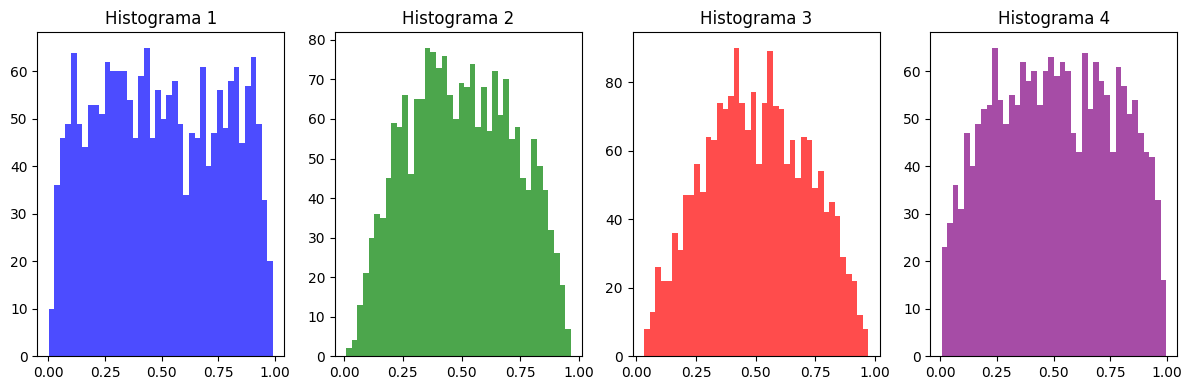

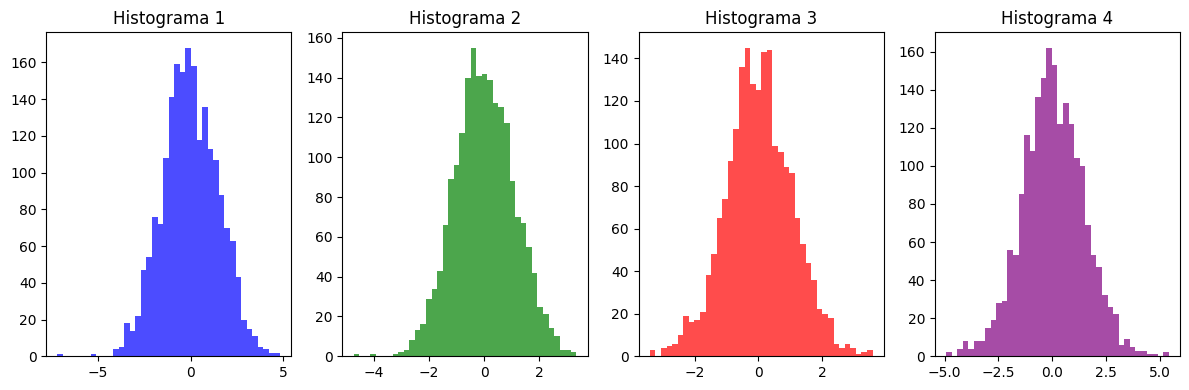

In [9]:
b0_2_4 = np.random.normal(0,1,s)
b1_2_4 = np.random.normal(0,1/np.std(x1_4),s)
x1_4_q1 = np.quantile(x1_4, 0.2)
x1_4_q2 = np.quantile(x1_4, 0.4)
x1_4_q3 = np.quantile(x1_4, 0.6)
x1_4_q4 = np.quantile(x1_4, 0.8)

eta_2_4_q1 = b0_2_4 + b1_2_4 * x1_4_q1
eta_2_4_q2 = b0_2_4 + b1_2_4 * x1_4_q2
eta_2_4_q3 = b0_2_4 + b1_2_4 * x1_4_q3
eta_2_4_q4 = b0_2_4 + b1_2_4 * x1_4_q4
p_2_4_q1 = expit(eta_2_4_q1)
p_2_4_q2 = expit(eta_2_4_q2)
p_2_4_q3 = expit(eta_2_4_q3)
p_2_4_q4 = expit(eta_2_4_q4)

print(np.std(eta_2_4_q3))
# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(p_2_4_q1, bins=40, color='blue', alpha=0.7)
axs[1].hist(p_2_4_q2, bins=40, color='green', alpha=0.7)
axs[2].hist(p_2_4_q3, bins=40, color='red', alpha=0.7)
axs[3].hist(p_2_4_q4, bins=40, color='purple', alpha=0.7)
axs[0].set_title('Histograma 1')
axs[1].set_title('Histograma 2')
axs[2].set_title('Histograma 3')
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show();

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(eta_2_4_q1, bins=40, color='blue', alpha=0.7)
axs[1].hist(eta_2_4_q2, bins=40, color='green', alpha=0.7)
axs[2].hist(eta_2_4_q3, bins=40, color='red', alpha=0.7)
axs[3].hist(eta_2_4_q4, bins=40, color='purple', alpha=0.7)
axs[0].set_title('Histograma 1')
axs[1].set_title('Histograma 2')
axs[2].set_title('Histograma 3')
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Caso 5 con X1 dist uniforme, semirango 1, variabilidad 1 en b0 y b1. No parece mal, eta podría tener mayor desvío. Luego, al estandarizar por sd(X1), vemos algunas diferencias en los cuantiles. poniendo sd=1.5 en b0 parece mejorar. 

1.0481418323409943


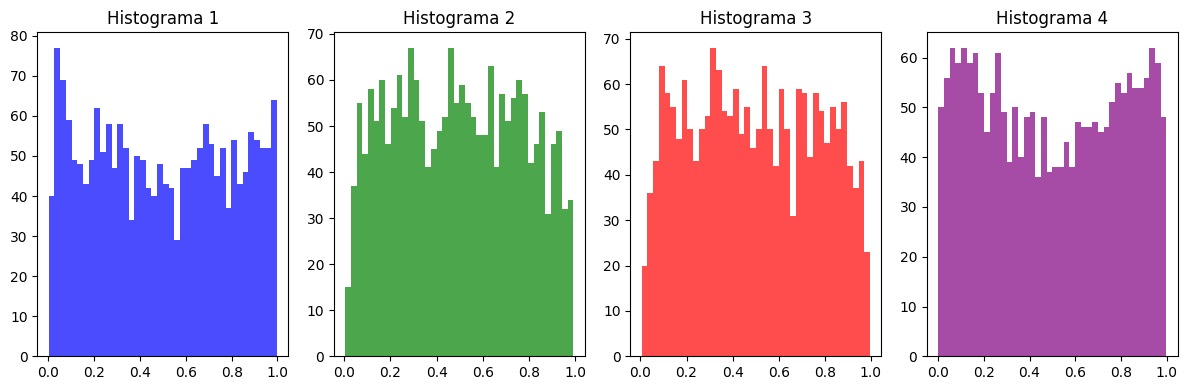

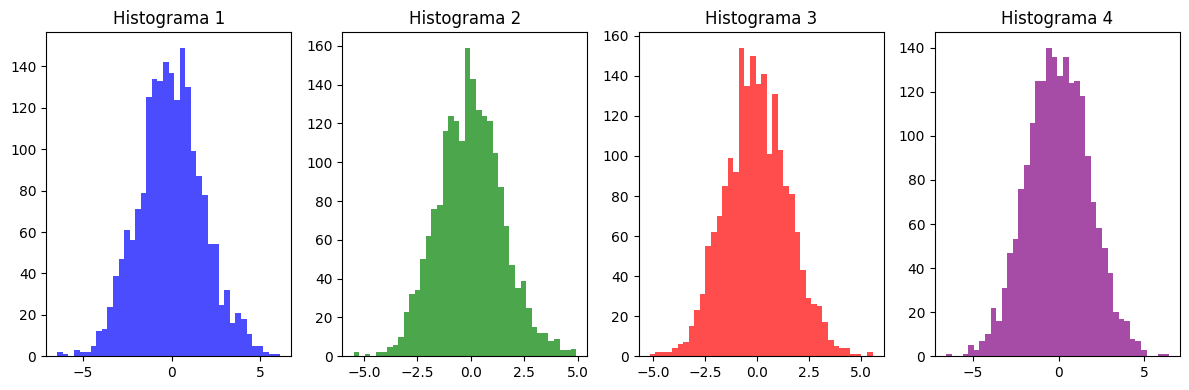

In [10]:
b0_2_5 = np.random.normal(0,1.5,s)
b1_2_5 = np.random.normal(0,1/np.std(x1_5),s)
x1_5_q1 = np.quantile(x1_5, 0.2)
x1_5_q2 = np.quantile(x1_5, 0.4)
x1_5_q3 = np.quantile(x1_5, 0.6)
x1_5_q4 = np.quantile(x1_5, 0.8)

eta_2_5_q1 = b0_2_5 + b1_2_5 * x1_5_q1
eta_2_5_q2 = b0_2_5 + b1_2_5 * x1_5_q2
eta_2_5_q3 = b0_2_5 + b1_2_5 * x1_5_q3
eta_2_5_q4 = b0_2_5 + b1_2_5 * x1_5_q4
p_2_5_q1 = expit(eta_2_5_q1)
p_2_5_q2 = expit(eta_2_5_q2)
p_2_5_q3 = expit(eta_2_5_q3)
p_2_5_q4 = expit(eta_2_5_q4)

print(np.std(eta_2_4_q3))
# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(p_2_5_q1, bins=40, color='blue', alpha=0.7)
axs[1].hist(p_2_5_q2, bins=40, color='green', alpha=0.7)
axs[2].hist(p_2_5_q3, bins=40, color='red', alpha=0.7)
axs[3].hist(p_2_5_q4, bins=40, color='purple', alpha=0.7)
axs[0].set_title('Histograma 1')
axs[1].set_title('Histograma 2')
axs[2].set_title('Histograma 3')
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show();

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(eta_2_5_q1, bins=40, color='blue', alpha=0.7)
axs[1].hist(eta_2_5_q2, bins=40, color='green', alpha=0.7)
axs[2].hist(eta_2_5_q3, bins=40, color='red', alpha=0.7)
axs[3].hist(eta_2_5_q4, bins=40, color='purple', alpha=0.7)
axs[0].set_title('Histograma 1')
axs[1].set_title('Histograma 2')
axs[2].set_title('Histograma 3')
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Caso 6 con X1 dist uniforme, semirango 5 , variabilidad 1 en b0 y b1. Se notan diferencias significativas entre los cuantiles. Luego de estandarizar, vuelve a estar como en el caso anterior. Mejora un poco poniendo 1.5 a b0, sin embargo esto podría ser menos. 


1.0481418323409943


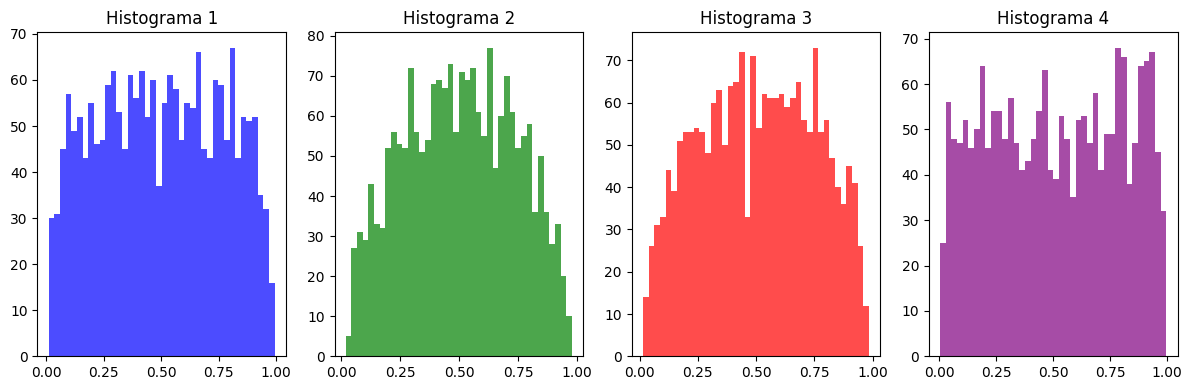

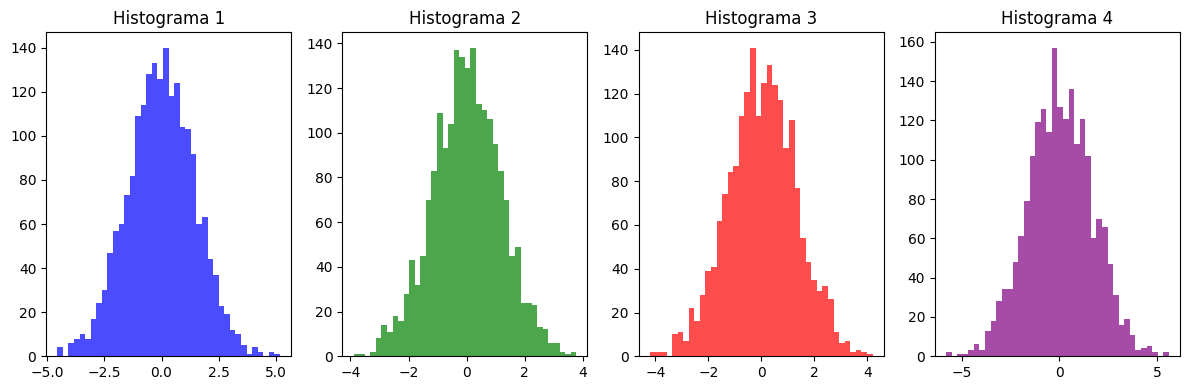

In [11]:
b0_2_6 = np.random.normal(0,1.2,s)
b1_2_6 = np.random.normal(0,1/np.std(x1_6),s)
x1_6_q1 = np.quantile(x1_6, 0.2)
x1_6_q2 = np.quantile(x1_6, 0.4)
x1_6_q3 = np.quantile(x1_6, 0.6)
x1_6_q4 = np.quantile(x1_6, 0.8)

eta_2_6_q1 = b0_2_6 + b1_2_6 * x1_6_q1
eta_2_6_q2 = b0_2_6 + b1_2_6 * x1_6_q2
eta_2_6_q3 = b0_2_6 + b1_2_6 * x1_6_q3
eta_2_6_q4 = b0_2_6 + b1_2_6 * x1_6_q4
p_2_6_q1 = expit(eta_2_6_q1)
p_2_6_q2 = expit(eta_2_6_q2)
p_2_6_q3 = expit(eta_2_6_q3)
p_2_6_q4 = expit(eta_2_6_q4)

print(np.std(eta_2_4_q3))
# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(p_2_6_q1, bins=40, color='blue', alpha=0.7)
axs[1].hist(p_2_6_q2, bins=40, color='green', alpha=0.7)
axs[2].hist(p_2_6_q3, bins=40, color='red', alpha=0.7)
axs[3].hist(p_2_6_q4, bins=40, color='purple', alpha=0.7)
axs[0].set_title('Histograma 1')
axs[1].set_title('Histograma 2')
axs[2].set_title('Histograma 3')
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show();

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Agregar histogramas a cada subplot
axs[0].hist(eta_2_6_q1, bins=40, color='blue', alpha=0.7)
axs[1].hist(eta_2_6_q2, bins=40, color='green', alpha=0.7)
axs[2].hist(eta_2_6_q3, bins=40, color='red', alpha=0.7)
axs[3].hist(eta_2_6_q4, bins=40, color='purple', alpha=0.7)
axs[0].set_title('Histograma 1')
axs[1].set_title('Histograma 2')
axs[2].set_title('Histograma 3')
axs[3].set_title('Histograma 4')

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Prueba de gráfico

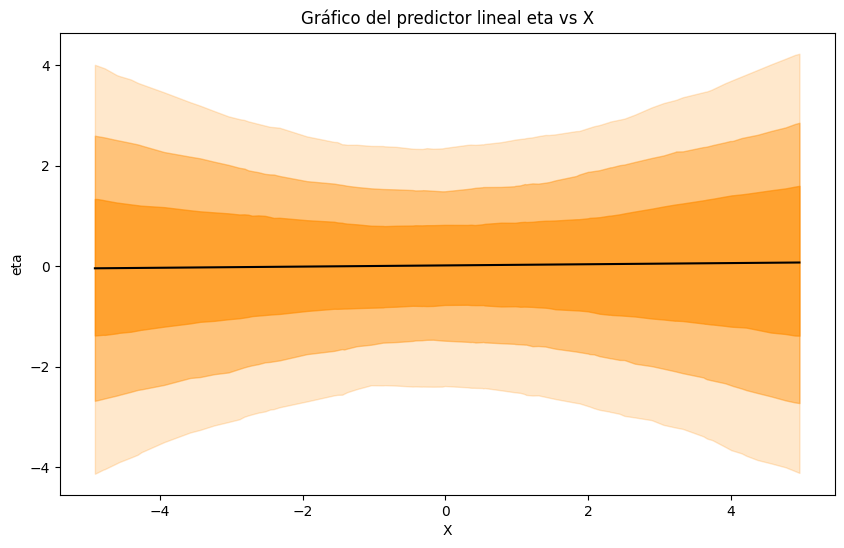

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Crear una función para calcular eta para un valor específico de X
def calculate_eta(X, beta_0, beta_1):
    return beta_0 + beta_1 * X



# Crear una matriz para almacenar las etas
eta_matrix = np.zeros((2000, 100))

# Calcular eta para cada combinación de beta_0, beta_1 y X
for i, x in enumerate(x1_6):
    eta_matrix[:, i] = calculate_eta(x, b0_2_6, b1_2_6)

# Calcular la media y los intervalos de confianza
eta_mean = np.mean(eta_matrix, axis=0)

# Percentiles para los intervalos de confianza
percentiles = [2.5, 10, 25, 75, 90, 97.5]
eta_percentiles = np.percentile(eta_matrix, percentiles, axis=0)

# Crear un DataFrame con los resultados
data = pd.DataFrame({
    'X': x1_6, 
    'Mean': eta_mean,
    'CI 2.5': eta_percentiles[0],
    'CI 10': eta_percentiles[1],
    'CI 25': eta_percentiles[2],
    'CI 75': eta_percentiles[3],
    'CI 90': eta_percentiles[4],
    'CI 97.5': eta_percentiles[5]
})

data = data.sort_values(by='X')

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar la media de eta
plt.plot(data['X'], data['Mean'], color='black')

# Graficar los intervalos de confianza
plt.fill_between(data['X'], data['CI 2.5'], data['CI 97.5'], color='darkorange', alpha=0.2)
plt.fill_between(data['X'], data['CI 10'], data['CI 90'], color='darkorange', alpha=0.4)
plt.fill_between(data['X'], data['CI 25'], data['CI 75'], color='darkorange', alpha=0.6)

plt.xlabel('X')
plt.ylabel('eta')
plt.title('Gráfico del predictor lineal eta vs X')
plt.show()



In [13]:
def grafico_x1(X1, beta0, beta1):
    # Crear una matriz para almacenar las etas
    eta_matrix = np.zeros((2000, 100))

    # Calcular eta para cada combinación de beta_0, beta_1 y X
    for i, x in enumerate(X1):
        eta_matrix[:, i] = calculate_eta(x, beta0, beta1)

    # Calcular la media y los intervalos de confianza
    eta_mean = np.mean(eta_matrix, axis=0)

    # Percentiles para los intervalos de confianza
    percentiles = [2.5, 10, 25, 75, 90, 97.5]
    eta_percentiles = np.percentile(eta_matrix, percentiles, axis=0)

    # Crear un DataFrame con los resultados
    data = pd.DataFrame({
        'X': X1, 
        'Mean': eta_mean,
        'CI 2.5': eta_percentiles[0],
        'CI 10': eta_percentiles[1],
        'CI 25': eta_percentiles[2],
        'CI 75': eta_percentiles[3],
        'CI 90': eta_percentiles[4],
        'CI 97.5': eta_percentiles[5]
    })

    data = data.sort_values(by='X')

    # Crear el gráfico
    plt.figure(figsize=(10, 6))

    # Graficar la media de eta
    plt.plot(data['X'], data['Mean'], color='black')

    # Graficar los intervalos de confianza
    plt.fill_between(data['X'], data['CI 2.5'], data['CI 97.5'], color='darkorange', alpha=0.2)
    plt.fill_between(data['X'], data['CI 10'], data['CI 90'], color='darkorange', alpha=0.4)
    plt.fill_between(data['X'], data['CI 25'], data['CI 75'], color='darkorange', alpha=0.6)

    plt.xlabel('X')
    plt.ylabel('eta')
    plt.title('Gráfico del predictor lineal eta vs X')
    plt.show();

# GRAFICOS

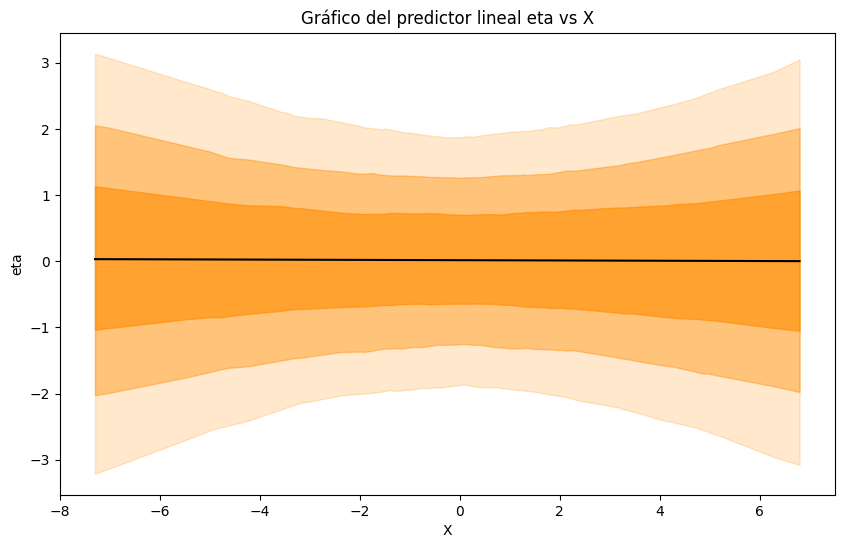

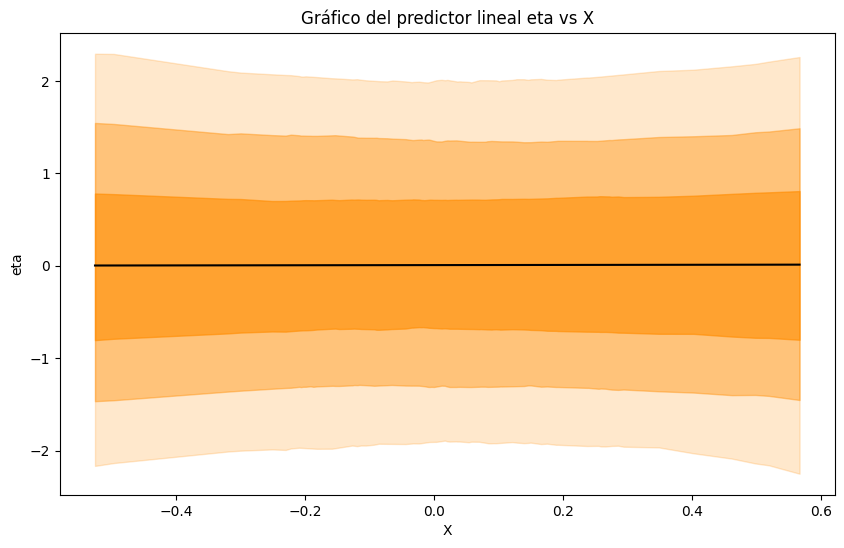

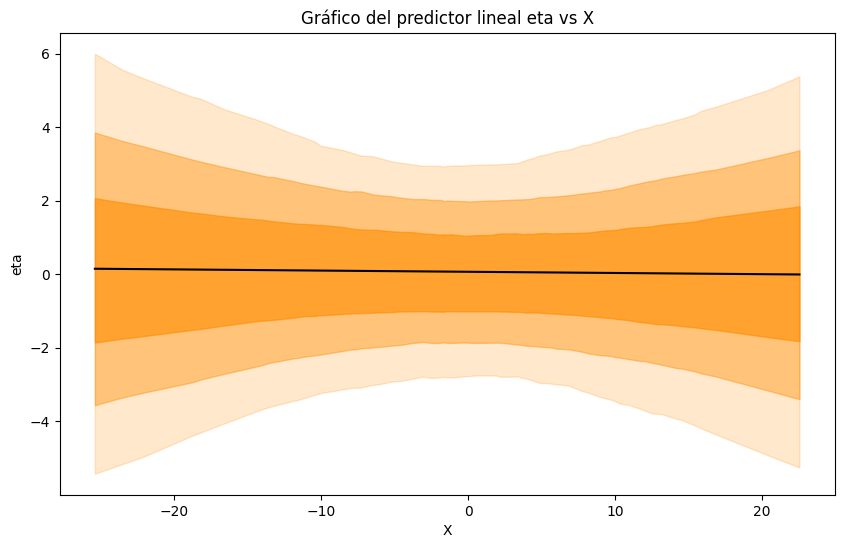

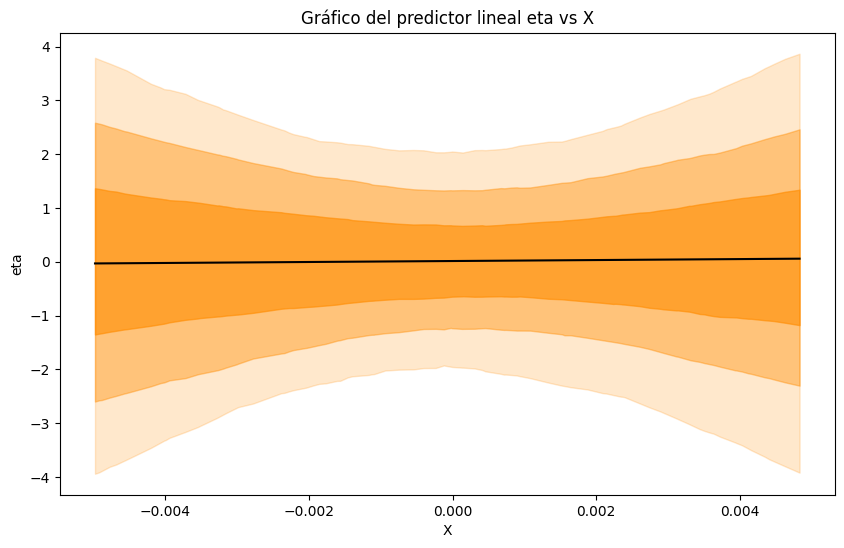

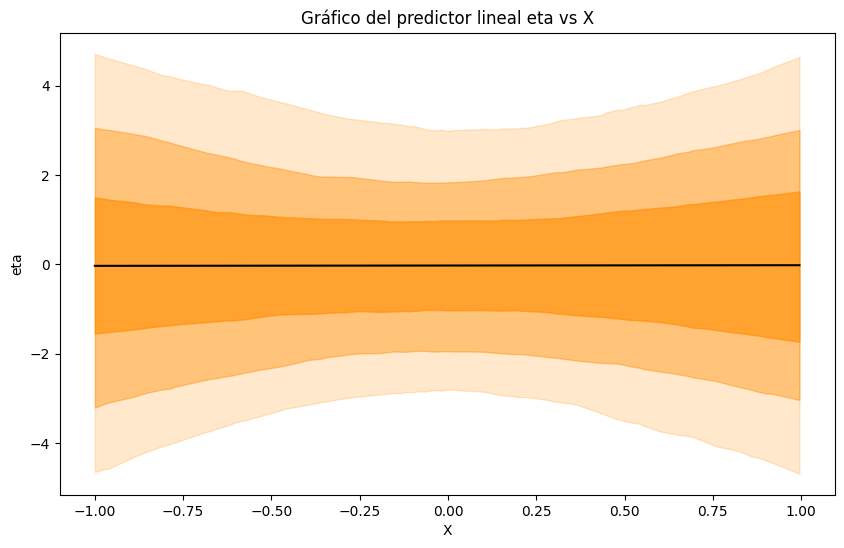

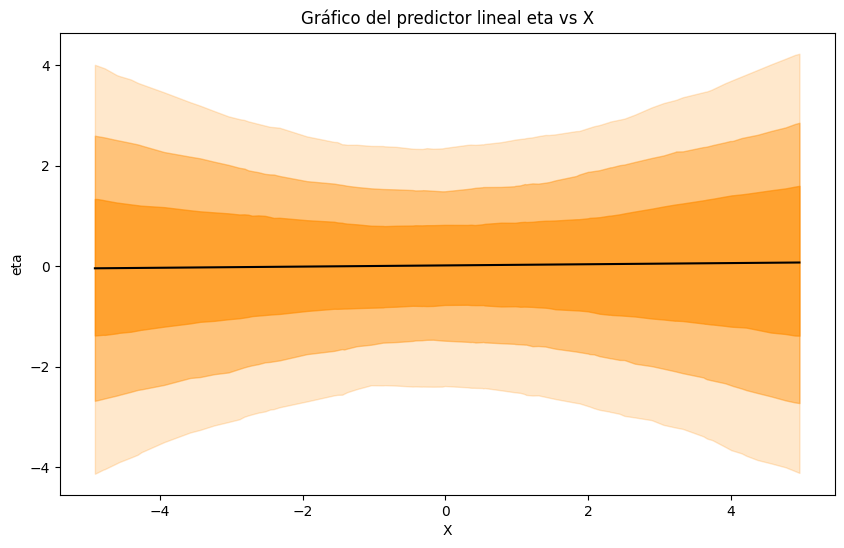

In [14]:
grafico_x1(x1_1, b0_2_1, b1_2_1)
grafico_x1(x1_2, b0_2_2, b1_2_2)
grafico_x1(x1_3, b0_2_3, b1_2_3)
grafico_x1(x1_4, b0_2_4, b1_2_4)
grafico_x1(x1_5, b0_2_5, b1_2_5)
grafico_x1(x1_6, b0_2_6, b1_2_6)

## Modelo con dos variables explicativas

Probamos modelar dos variables expicativas dentro del modelo muliplicando la variabilidad del $\eta$. 

$$\eta = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

### Variable explicativas $X_1$ y $X_2$

Podríamos tomar los mismos casos que tomamos en el apartado anterior, solo que ahora tenemos todas las combinaciones por ambas variables, haciendo que en lugar de 6 sean 36 escenarios. Es por esto que intentaremos mostrar solo algunos casos, cambiando las variabilidades.
* Distribución: Normal 
* Variabilidad: 3, 0.2, 10 
* Distinta combinación de variabilidad de $\beta_0$ y $\beta_1$

In [31]:
x1_1 = np.random.normal(0,0.2,n)

x2_1 = np.random.normal(0,3,n)


Probé con un mismo gráfico cambiando los valores aquí. 

1.55475131775953


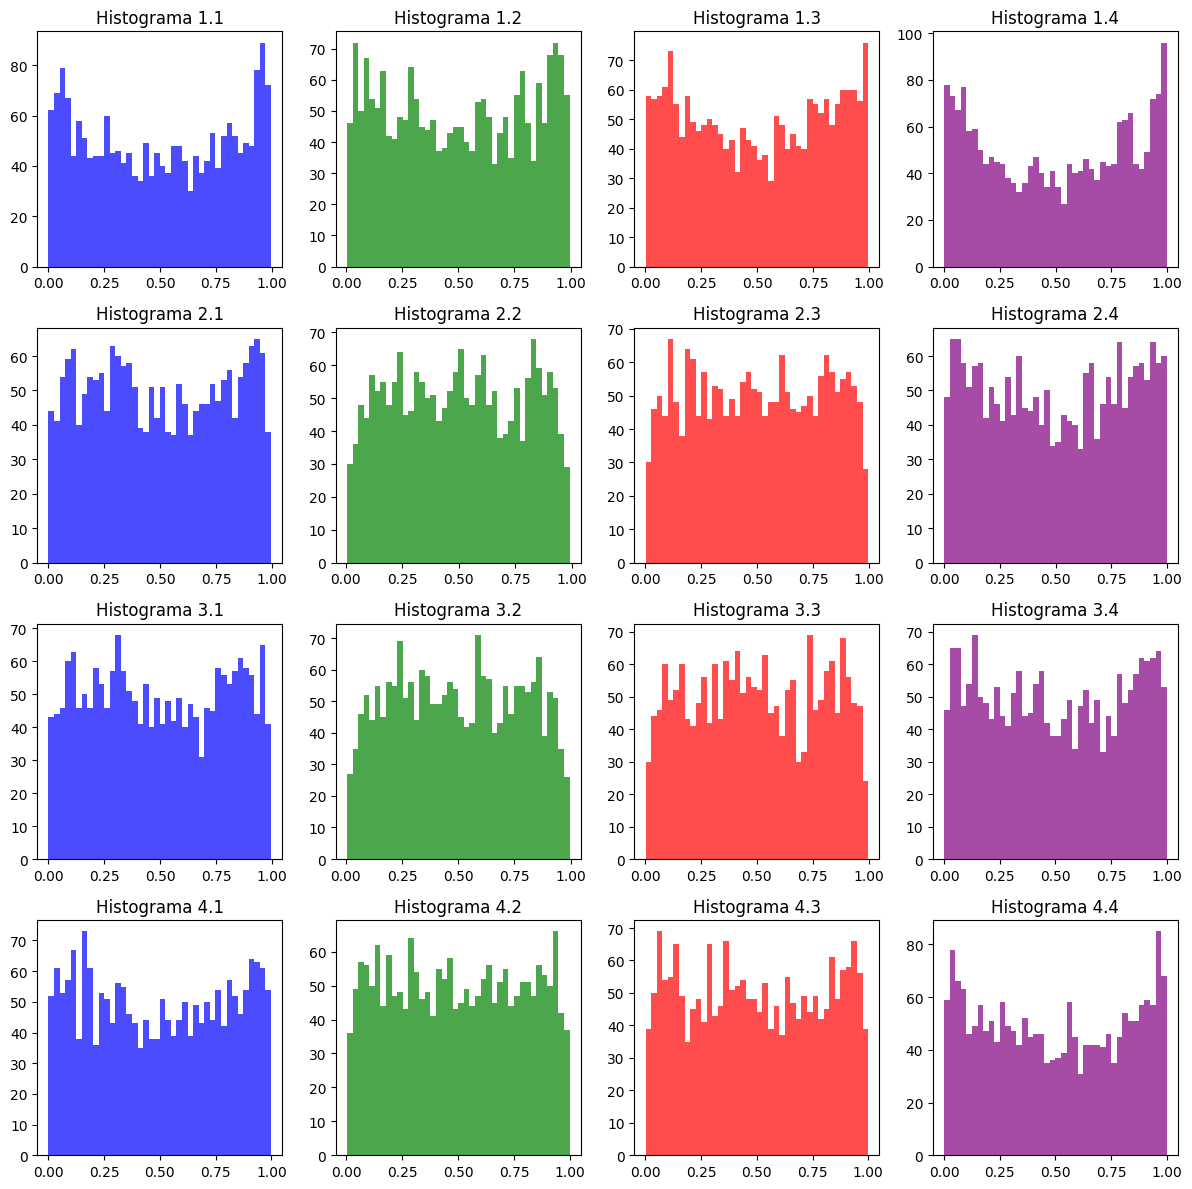

In [33]:
b0_3_1 = np.random.normal(0,1.5,s)
b1_3_1 = np.random.normal(0,1/np.std(x1_1),s)
b2_3_1 = np.random.normal(0,1/np.std(x2_1),s)
x1_1_q1 = np.quantile(x1_1, 0.2)
x1_1_q2 = np.quantile(x1_1, 0.4)
x1_1_q3 = np.quantile(x1_1, 0.6)
x1_1_q4 = np.quantile(x1_1, 0.8)
x2_1_q1 = np.quantile(x2_1, 0.2)
x2_1_q2 = np.quantile(x2_1, 0.4)
x2_1_q3 = np.quantile(x2_1, 0.6)
x2_1_q4 = np.quantile(x2_1, 0.8)

eta_3_1_q11 = b0_3_1 + b1_3_1 * x1_1_q1 + b2_3_1 * x2_1_q1
eta_3_1_q12 = b0_3_1 + b1_3_1 * x1_1_q1 + b2_3_1 * x2_1_q2
eta_3_1_q13 = b0_3_1 + b1_3_1 * x1_1_q1 + b2_3_1 * x2_1_q3
eta_3_1_q14 = b0_3_1 + b1_3_1 * x1_1_q1 + b2_3_1 * x2_1_q4
eta_3_1_q21 = b0_3_1 + b1_3_1 * x1_1_q2 + b2_3_1 * x2_1_q1
eta_3_1_q22 = b0_3_1 + b1_3_1 * x1_1_q2 + b2_3_1 * x2_1_q2
eta_3_1_q23 = b0_3_1 + b1_3_1 * x1_1_q2 + b2_3_1 * x2_1_q3
eta_3_1_q24 = b0_3_1 + b1_3_1 * x1_1_q2 + b2_3_1 * x2_1_q4
eta_3_1_q31 = b0_3_1 + b1_3_1 * x1_1_q3 + b2_3_1 * x2_1_q1
eta_3_1_q32 = b0_3_1 + b1_3_1 * x1_1_q3 + b2_3_1 * x2_1_q2
eta_3_1_q33 = b0_3_1 + b1_3_1 * x1_1_q3 + b2_3_1 * x2_1_q3
eta_3_1_q34 = b0_3_1 + b1_3_1 * x1_1_q3 + b2_3_1 * x2_1_q4
eta_3_1_q41 = b0_3_1 + b1_3_1 * x1_1_q4 + b2_3_1 * x2_1_q1
eta_3_1_q42 = b0_3_1 + b1_3_1 * x1_1_q4 + b2_3_1 * x2_1_q2
eta_3_1_q43 = b0_3_1 + b1_3_1 * x1_1_q4 + b2_3_1 * x2_1_q3
eta_3_1_q44 = b0_3_1 + b1_3_1 * x1_1_q4 + b2_3_1 * x2_1_q4
p_3_1_q11 = expit(eta_3_1_q11)
p_3_1_q12 = expit(eta_3_1_q12)
p_3_1_q13 = expit(eta_3_1_q13)
p_3_1_q14 = expit(eta_3_1_q14)
p_3_1_q21 = expit(eta_3_1_q21)
p_3_1_q22 = expit(eta_3_1_q22)
p_3_1_q23 = expit(eta_3_1_q23)
p_3_1_q24 = expit(eta_3_1_q24)
p_3_1_q31 = expit(eta_3_1_q31)
p_3_1_q32 = expit(eta_3_1_q32)
p_3_1_q33 = expit(eta_3_1_q33)
p_3_1_q34 = expit(eta_3_1_q34)
p_3_1_q41 = expit(eta_3_1_q41)
p_3_1_q42 = expit(eta_3_1_q42)
p_3_1_q43 = expit(eta_3_1_q43)
p_3_1_q44 = expit(eta_3_1_q44)

print(np.std(eta_3_1_q3))
# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Agregar histogramas a cada subplot
axs[0, 0].hist(p_3_1_q11, bins=40, color='blue', alpha=0.7)
axs[0, 1].hist(p_3_1_q12, bins=40, color='green', alpha=0.7)
axs[0, 2].hist(p_3_1_q13, bins=40, color='red', alpha=0.7)
axs[0, 3].hist(p_3_1_q14, bins=40, color='purple', alpha=0.7)
axs[0, 0].set_title('Histograma 1.1')
axs[0, 1].set_title('Histograma 1.2')
axs[0, 2].set_title('Histograma 1.3')
axs[0, 3].set_title('Histograma 1.4')
axs[1, 0].hist(p_3_1_q21, bins=40, color='blue', alpha=0.7)
axs[1, 1].hist(p_3_1_q22, bins=40, color='green', alpha=0.7)
axs[1, 2].hist(p_3_1_q23, bins=40, color='red', alpha=0.7)
axs[1, 3].hist(p_3_1_q24, bins=40, color='purple', alpha=0.7)
axs[1, 0].set_title('Histograma 2.1')
axs[1, 1].set_title('Histograma 2.2')
axs[1, 2].set_title('Histograma 2.3')
axs[1, 3].set_title('Histograma 2.4')
axs[2, 0].hist(p_3_1_q31, bins=40, color='blue', alpha=0.7)
axs[2, 1].hist(p_3_1_q32, bins=40, color='green', alpha=0.7)
axs[2, 2].hist(p_3_1_q33, bins=40, color='red', alpha=0.7)
axs[2, 3].hist(p_3_1_q34, bins=40, color='purple', alpha=0.7)
axs[2, 0].set_title('Histograma 3.1')
axs[2, 1].set_title('Histograma 3.2')
axs[2, 2].set_title('Histograma 3.3')
axs[2, 3].set_title('Histograma 3.4')
axs[3, 0].hist(p_3_1_q41, bins=40, color='blue', alpha=0.7)
axs[3, 1].hist(p_3_1_q42, bins=40, color='green', alpha=0.7)
axs[3, 2].hist(p_3_1_q43, bins=40, color='red', alpha=0.7)
axs[3, 3].hist(p_3_1_q44, bins=40, color='purple', alpha=0.7)
axs[3, 0].set_title('Histograma 4.1')
axs[3, 1].set_title('Histograma 4.2')
axs[3, 2].set_title('Histograma 4.3')
axs[3, 3].set_title('Histograma 4.4')

# Ajustar el diseño
plt.tight_layout()
plt.show();

## Modelo con tres variables explicativas

Probamos modelar tres variables expicativas dentro del modelo muliplicando la variabilidad del $\eta$. 

$$\eta = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$$

Probando cambiar las variabilidades de las lineas 1, 3 y 5 se ve que no se producen cambos significativos en la variabilidad del eta, ni de los gráficos en el panel. También se puede probar cambiar los dígitos de los códigos de las lineas 24 a 39. Cambiando cuantiles de cualquier eta, o principalmente en este caso de $x_3$, que serían todos los últimos dígitos.

1.558551233435908


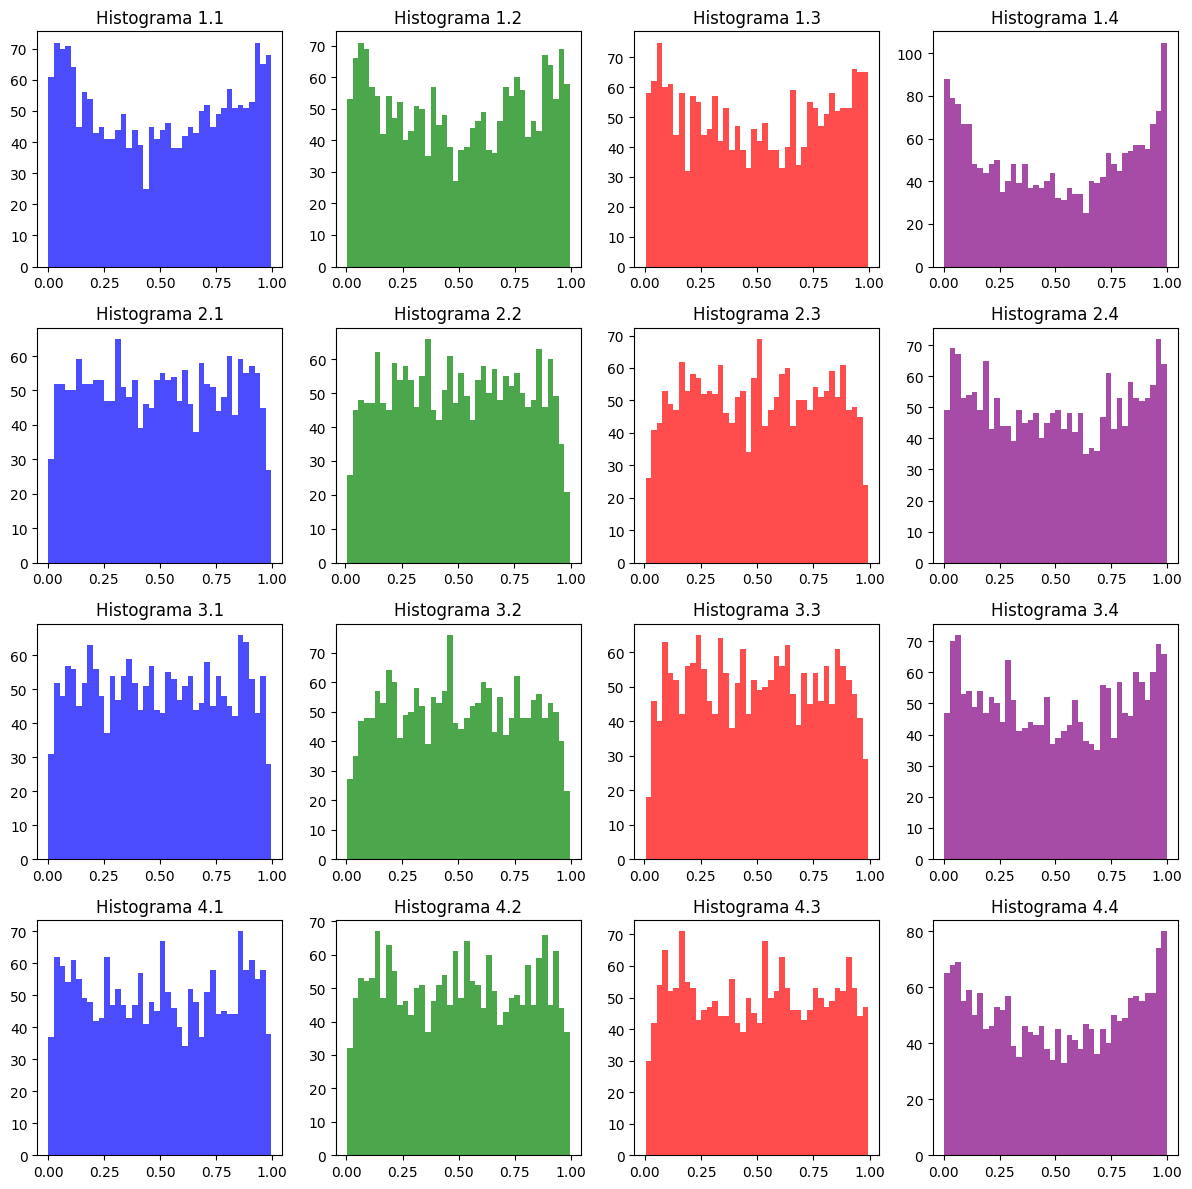

In [41]:
x1_1 = np.random.normal(0,1.2,n)

x2_1 = np.random.normal(0,100,n)

x3_1 = np.random.normal(0,10,n)

b0_3_1 = np.random.normal(0,1.5,s)
b1_3_1 = np.random.normal(0,1/np.std(x1_1),s)
b2_3_1 = np.random.normal(0,1/np.std(x2_1),s)
b3_3_1 = np.random.normal(0,1/np.std(x3_1),s)
x1_1_q1 = np.quantile(x1_1, 0.2)
x1_1_q2 = np.quantile(x1_1, 0.4)
x1_1_q3 = np.quantile(x1_1, 0.6)
x1_1_q4 = np.quantile(x1_1, 0.8)
x2_1_q1 = np.quantile(x2_1, 0.2)
x2_1_q2 = np.quantile(x2_1, 0.4)
x2_1_q3 = np.quantile(x2_1, 0.6)
x2_1_q4 = np.quantile(x2_1, 0.8)
x3_1_q1 = np.quantile(x3_1, 0.2)
x3_1_q2 = np.quantile(x3_1, 0.4)
x3_1_q3 = np.quantile(x3_1, 0.6)
x3_1_q4 = np.quantile(x3_1, 0.8)

eta_3_1_q11 = b0_3_1 + b1_3_1 * x1_1_q1 + b2_3_1 * x2_1_q1 + b3_3_1 * x3_1_q3
eta_3_1_q12 = b0_3_1 + b1_3_1 * x1_1_q1 + b2_3_1 * x2_1_q2 + b3_3_1 * x3_1_q3
eta_3_1_q13 = b0_3_1 + b1_3_1 * x1_1_q1 + b2_3_1 * x2_1_q3 + b3_3_1 * x3_1_q3
eta_3_1_q14 = b0_3_1 + b1_3_1 * x1_1_q1 + b2_3_1 * x2_1_q4 + b3_3_1 * x3_1_q3
eta_3_1_q21 = b0_3_1 + b1_3_1 * x1_1_q2 + b2_3_1 * x2_1_q1 + b3_3_1 * x3_1_q3
eta_3_1_q22 = b0_3_1 + b1_3_1 * x1_1_q2 + b2_3_1 * x2_1_q2 + b3_3_1 * x3_1_q3
eta_3_1_q23 = b0_3_1 + b1_3_1 * x1_1_q2 + b2_3_1 * x2_1_q3 + b3_3_1 * x3_1_q3
eta_3_1_q24 = b0_3_1 + b1_3_1 * x1_1_q2 + b2_3_1 * x2_1_q4 + b3_3_1 * x3_1_q3
eta_3_1_q31 = b0_3_1 + b1_3_1 * x1_1_q3 + b2_3_1 * x2_1_q1 + b3_3_1 * x3_1_q3
eta_3_1_q32 = b0_3_1 + b1_3_1 * x1_1_q3 + b2_3_1 * x2_1_q2 + b3_3_1 * x3_1_q3
eta_3_1_q33 = b0_3_1 + b1_3_1 * x1_1_q3 + b2_3_1 * x2_1_q3 + b3_3_1 * x3_1_q3
eta_3_1_q34 = b0_3_1 + b1_3_1 * x1_1_q3 + b2_3_1 * x2_1_q4 + b3_3_1 * x3_1_q3
eta_3_1_q41 = b0_3_1 + b1_3_1 * x1_1_q4 + b2_3_1 * x2_1_q1 + b3_3_1 * x3_1_q3
eta_3_1_q42 = b0_3_1 + b1_3_1 * x1_1_q4 + b2_3_1 * x2_1_q2 + b3_3_1 * x3_1_q3
eta_3_1_q43 = b0_3_1 + b1_3_1 * x1_1_q4 + b2_3_1 * x2_1_q3 + b3_3_1 * x3_1_q3
eta_3_1_q44 = b0_3_1 + b1_3_1 * x1_1_q4 + b2_3_1 * x2_1_q4 + b3_3_1 * x3_1_q3
p_3_1_q11 = expit(eta_3_1_q11)
p_3_1_q12 = expit(eta_3_1_q12)
p_3_1_q13 = expit(eta_3_1_q13)
p_3_1_q14 = expit(eta_3_1_q14)
p_3_1_q21 = expit(eta_3_1_q21)
p_3_1_q22 = expit(eta_3_1_q22)
p_3_1_q23 = expit(eta_3_1_q23)
p_3_1_q24 = expit(eta_3_1_q24)
p_3_1_q31 = expit(eta_3_1_q31)
p_3_1_q32 = expit(eta_3_1_q32)
p_3_1_q33 = expit(eta_3_1_q33)
p_3_1_q34 = expit(eta_3_1_q34)
p_3_1_q41 = expit(eta_3_1_q41)
p_3_1_q42 = expit(eta_3_1_q42)
p_3_1_q43 = expit(eta_3_1_q43)
p_3_1_q44 = expit(eta_3_1_q44)

print(np.std(eta_3_1_q33))
# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Agregar histogramas a cada subplot
axs[0, 0].hist(p_3_1_q11, bins=40, color='blue', alpha=0.7)
axs[0, 1].hist(p_3_1_q12, bins=40, color='green', alpha=0.7)
axs[0, 2].hist(p_3_1_q13, bins=40, color='red', alpha=0.7)
axs[0, 3].hist(p_3_1_q14, bins=40, color='purple', alpha=0.7)
axs[0, 0].set_title('Histograma 1.1')
axs[0, 1].set_title('Histograma 1.2')
axs[0, 2].set_title('Histograma 1.3')
axs[0, 3].set_title('Histograma 1.4')
axs[1, 0].hist(p_3_1_q21, bins=40, color='blue', alpha=0.7)
axs[1, 1].hist(p_3_1_q22, bins=40, color='green', alpha=0.7)
axs[1, 2].hist(p_3_1_q23, bins=40, color='red', alpha=0.7)
axs[1, 3].hist(p_3_1_q24, bins=40, color='purple', alpha=0.7)
axs[1, 0].set_title('Histograma 2.1')
axs[1, 1].set_title('Histograma 2.2')
axs[1, 2].set_title('Histograma 2.3')
axs[1, 3].set_title('Histograma 2.4')
axs[2, 0].hist(p_3_1_q31, bins=40, color='blue', alpha=0.7)
axs[2, 1].hist(p_3_1_q32, bins=40, color='green', alpha=0.7)
axs[2, 2].hist(p_3_1_q33, bins=40, color='red', alpha=0.7)
axs[2, 3].hist(p_3_1_q34, bins=40, color='purple', alpha=0.7)
axs[2, 0].set_title('Histograma 3.1')
axs[2, 1].set_title('Histograma 3.2')
axs[2, 2].set_title('Histograma 3.3')
axs[2, 3].set_title('Histograma 3.4')
axs[3, 0].hist(p_3_1_q41, bins=40, color='blue', alpha=0.7)
axs[3, 1].hist(p_3_1_q42, bins=40, color='green', alpha=0.7)
axs[3, 2].hist(p_3_1_q43, bins=40, color='red', alpha=0.7)
axs[3, 3].hist(p_3_1_q44, bins=40, color='purple', alpha=0.7)
axs[3, 0].set_title('Histograma 4.1')
axs[3, 1].set_title('Histograma 4.2')
axs[3, 2].set_title('Histograma 4.3')
axs[3, 3].set_title('Histograma 4.4')

# Ajustar el diseño
plt.tight_layout()
plt.show();